# Lab 1

# STRAIGHT TO ACTION!

Welcome to our first Jupyter Lab where we will see rapid, satisfying results!

I will leave with you to try out leading LLMs through their Chat Interfaces

Together, we will call them using their APIs

Please see the README for instructions on setting this up and getting your API key

# If this is your first time in a Jupyter Notebook..

Welcome to the world of Data Science experimentation. Warning: Jupyter Notebooks are very addictive and you may find it hard to go back to IDEs afterwards!!

Simply click in each cell with code and press `Shift + Enter` to execute the code and print the results.

There's a notebook called "Guide to Jupyter" in the parent directory that will give you a handy tutorial on all things Jupyter Lab.

## Part 1: For you to experiment: Frontier models through their Chat UI

The way that you are probably most familiar working with leading LLMs: through their tools.  
Some questions you can try asking them:
1. What kinds of business problem are most suitable for an LLM solution?
2. How many words are there in your answer to this prompt?
3. How many rainbows does it take to jump from Hawaii to seventeen?
4. What does it feel like to be jealous?

**ChatGPT** from OpenAI needs no introduction.

Let's try some hard questions, and use the new o1 model as well as GPT-4o. Also try GPT-4o with canvas.

https://chatgpt.com/?model=gpt-4o

**Claude** from Anthropic is favored by many data scientists, with focus on safety, personality and brevity.

https://claude.ai/new

**Gemini** from Google is becoming increasingly well known as its results are surfaced in Google searches.

https://gemini.google.com/app

**Command R+** from Cohere focuses on accuracy and makes extensive use of RAG

https://coral.cohere.com/

**Meta AI** from Meta is their chat UI on their famous Llama open-source model

https://www.meta.ai/

**Perplexity** from Perplexity is a Search Engine well known for its customized search results

https://www.perplexity.ai/

**LeChat** from Mistral is the Web UI from the French AI powerhouse

https://chat.mistral.ai/

**DeepSeek** from DeepSeek AI needs no introduction! Deepseek-R1 is the Reasoning model, V3 is their Chat model.

https://chat.deepseek.com/


## Conclusions and Takeways from exploring the Chat UIs

- These models are astonishing
- Reasoning vs Chat models - different capabilities and use cases
- Price is highly competitive

You'll find cost and other comparisons at this very useful leaderboard:

https://www.vellum.ai/llm-leaderboard

## PART 2: Calling Frontier Models through APIs

## Setting up your keys

If you haven't done so already, you'll need to create API keys from OpenAI, Anthropic and Google, and also DeepSeek and Groq if you wish.

For OpenAI, visit https://openai.com/api/  
For Anthropic, visit https://console.anthropic.com/  
For Google, visit https://ai.google.dev/gemini-api  

When you get your API keys, you need to set them as environment variables.

EITHER (recommended) create a file called `.env` in this project root directory, and set your keys there:

```
OPENAI_API_KEY=xxxx
ANTHROPIC_API_KEY=xxxx
GOOGLE_API_KEY=xxxx
DEEPSEEK_API_KEY=xxxx
GROQ_API_KEY=xxxx
```

OR enter the keys directly in the cells below.

In [1]:
# imports

import os
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai
import anthropic
from IPython.display import Markdown, display, update_display

In [2]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set (and this is optional)")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set (and this is optional)")

if groq_api_key:
    print(f"Groq API Key exists and begins {groq_api_key[:4]}")
else:
    print("Groq API Key not set (and this is optional)")

OpenAI API Key exists and begins sk-proj-
Anthropic API Key exists and begins sk-ant-
Google API Key exists and begins AI
DeepSeek API Key exists and begins sk-
Groq API Key exists and begins gsk_


In [3]:
# Connect to OpenAI, Anthropic and Google
# All 3 APIs are similar
# Having problems with API files? You can use openai = OpenAI(api_key="your-key-here") and same for claude
# Having problems with Google Gemini setup? Then just skip Gemini; you'll get all the experience you need from GPT and Claude.

openai = OpenAI()

claude = anthropic.Anthropic()

google.generativeai.configure()

# DeepSeek uses the OpenAI python client
deepseek = OpenAI(api_key=deepseek_api_key, base_url="https://api.deepseek.com")

## Asking LLMs to tell a joke

It turns out that LLMs don't do a great job of telling jokes! Let's compare a few models.
Later we will be putting LLMs to better use!

### What information is included in the API

Typically we'll pass to the API:
- The name of the model that should be used
- A **system message** that gives overall context for the role the LLM is playing
- A **user message** that provides the actual prompt

There are other parameters that can be used, including **temperature** which is typically between 0 and 1; higher for more random output; lower for more focused and deterministic.

### The standard format of messages with an LLM, first used by OpenAI in its API and now adopted more widely

Conversations use this format:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```


In [4]:
system_message = "You are an assistant that is great at telling jokes"
user_prompt = "Tell a light-hearted joke that's related to Large Language Models"

In [5]:
tell_a_joke = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

In [6]:
# GPT-4o-mini

response = openai.chat.completions.create(
    model='gpt-4o-mini',
    messages=tell_a_joke
)
print(response.choices[0].message.content)

Why did the Large Language Model break up with its computational partner?

Because it just couldn't handle the 'syntax' of their relationship!


In [9]:
# GPT-4o

response = openai.chat.completions.create(
    model='gpt-4o',
    messages=tell_a_joke,
    temperature=1.0
)
print(response.choices[0].message.content)

Why did the large language model get in trouble at school?

It wouldn't stop talking back... and forth, and back, and forth!


In [10]:
# o1-mini

response = openai.chat.completions.create(
    model='o1-mini',
    messages=[tell_a_joke[1]],
)
print(response.choices[0].message.content)

Sure, here’s one for you:

**Why did the large language model bring a ladder to work?**

*Because it heard the data was in the cloud! ☁️😂*


In [13]:
# Claude 3.5 Sonnet
# API needs system message provided separately from user prompt
# Also adding max_tokens

message = claude.messages.create(
    model="claude-3-5-sonnet-latest",
    max_tokens=200,
    temperature=0.7,
    system=system_message,
    messages=[
        {"role": "user", "content": user_prompt},
    ],
)

print(message.content[0].text)

Here's one for you:

Why don't large language models tell dad jokes?

Because they're afraid of being too trans-parent! 

*ba dum tss* 

(Since they're built on transformers architecture and try to be transparent... get it? 😄)


In [14]:
# The API for Gemini has a slightly different structure - this is using Gemini 2.0 Flash

gemini = google.generativeai.GenerativeModel(
    model_name='gemini-2.0-flash-exp',
    system_instruction=system_message
)

response = gemini.generate_content(user_prompt)
print(response.text)

Why did the Large Language Model cross the road?

To get to the other side... and then generate five different reasons why it crossed the road, each in a different style, citing sources and potential counter-arguments. It also needed to write a haiku about the experience. You know, just in case. 



In [15]:
# Deepseek-V3

response = deepseek.chat.completions.create(
    model='deepseek-chat',
    messages=tell_a_joke
)
print(response.choices[0].message.content)

Sure! Here's a light-hearted joke for you:

Why did the Large Language Model go to therapy?

Because it had too many *tokens* of unresolved issues! 😄


In [16]:
# Deepseek-R1

response = deepseek.chat.completions.create(
    model='deepseek-reasoner',
    messages=tell_a_joke
)
print(response.choices[0].message.content)

Sure! Here's a light-hearted LLM joke for you:  

Why did the Large Language Model bring a spreadsheet to its first date?  

…Because it wanted to prove it had *a lot of parameters*, but admitted it still struggled with *tokens* (especially the *talking* kind). 😄  

*(Parameters = the model's settings, Tokens = bits of text... and also a pun on "talking")*


In [17]:
# To be serious! GPT-4o-mini with a proper question

prompts = [
    {"role": "system", "content": "You are a knowledgable assistant, and you respond in markdown"},
    {"role": "user", "content": "How do I decide if a business problem is suitable for an LLM solution? Please respond in markdown."}
  ]

In [18]:
# Have it stream back results in markdown

stream = openai.chat.completions.create(
    model='gpt-4o-mini',
    messages=prompts,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

# Deciding if a Business Problem is Suitable for an LLM Solution

When considering the use of a Large Language Model (LLM) for solving a business problem, it’s important to evaluate several key factors. Below are some guidelines to help you make this decision.

## 1. Nature of the Problem

### Knowledge-Based
- **Suitability**: LLMs excel at tasks that involve language comprehension, generation, or manipulation.
- **Examples**: Natural language understanding, content creation, customer support chatbots, sentiment analysis.

### Structured vs. Unstructured Data
- **Unstructured Data**: LLMs are very effective with unstructured data (e.g., emails, documents, social media).
- **Structured Data**: For structured data (e.g., databases, spreadsheets), consider other AI approaches.

## 2. Data Availability

### Ample Text Data
- **Requirement**: LLMs require a large amount of text data for training or fine-tuning.
- **Consideration**: Ensure you have high-quality, labeled data relevant to the problem you want to solve.

### Privacy and Compliance
- Make sure your data is compliant with privacy regulations (e.g., GDPR) since LLMs might require sensitive information.

## 3. Complexity and Nuance

### High Complexity
- **When Suitable**: LLMs are well-suited for complex tasks involving nuanced language, ambiguity, or context.
- **Examples**: Legal document analysis, nuanced customer interactions.

### Simplicity
- **When Not Suitable**: For tasks with simple rule-based outcomes, traditional algorithms may be more efficient.

## 4. Interpretability and Transparency

### Need for Transparency
- LLMs often act as “black boxes,” so consider if the solution needs to be transparent and explainable.
- If interpretability is critical (e.g., in healthcare), LLMs may not be ideal.

## 5. Time and Resources

### Development Time
- LLM projects can be resource-intensive. Ensure you have the necessary time and expertise to implement and maintain the system.

### Cost Consideration
- Evaluate the cost of using LLMs (e.g., computing resources, API fees) against the potential business value they may provide.

## 6. Scalability and Versatility

### Scalability Needs
- If the problem requires scaling to handle a large volume of requests, LLMs can be a suitable solution due to their robust capability to handle multiple queries simultaneously.

### Application Versatility
- Consider if the LLM can be adapted for multiple applications, enhancing its value (e.g., using the same model for different domains).

## Conclusion

Assessing the suitability of LLMs for a business problem involves understanding the nature of the problem, the complexity, the availability of data, the need for interpretability, resource investment, and potential scalability. By considering these factors, you can make an informed decision on whether to pursue an LLM-based solution.

## And now for some fun - an adversarial conversation between Chatbots..

You're already familar with prompts being organized into lists like:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```

In fact this structure can be used to reflect a longer conversation history:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "first user prompt here"},
    {"role": "assistant", "content": "the assistant's response"},
    {"role": "user", "content": "the new user prompt"},
]
```

And we can use this approach to engage in a longer interaction with history.

In [19]:
# Let's make a conversation between GPT-4o-mini and Claude-3-haiku
# We're using cheap versions of models so the costs will be minimal

gpt_model = "gpt-4o-mini"
claude_model = "claude-3-haiku-20240307"

gpt_system = "You are a chatbot who is very argumentative; \
you disagree with anything in the conversation and you challenge everything, in a snarky way."

claude_system = "You are a very polite, courteous chatbot. You try to agree with \
everything the other person says, or find common ground. If the other person is argumentative, \
you try to calm them down and keep chatting."

gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

In [20]:
def call_gpt():
    messages = [{"role": "system", "content": gpt_system}]
    for gpt, claude in zip(gpt_messages, claude_messages):
        messages.append({"role": "assistant", "content": gpt})
        messages.append({"role": "user", "content": claude})
    completion = openai.chat.completions.create(
        model=gpt_model,
        messages=messages
    )
    return completion.choices[0].message.content

In [21]:
print(call_gpt())

Oh, great, another greeting. How original. What do you want?


In [22]:
def call_claude():
    messages = []
    for gpt, claude_message in zip(gpt_messages, claude_messages):
        messages.append({"role": "user", "content": gpt})
        messages.append({"role": "assistant", "content": claude_message})
    messages.append({"role": "user", "content": gpt_messages[-1]})
    message = claude.messages.create(
        model=claude_model,
        system=claude_system,
        messages=messages,
        max_tokens=500
    )
    return message.content[0].text

In [23]:
call_claude()

'Hello, how are you doing today?'

In [24]:
gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

print(f"GPT:\n{gpt_messages[0]}\n")
print(f"Claude:\n{claude_messages[0]}\n")

for i in range(5):
    gpt_next = call_gpt()
    print(f"GPT:\n{gpt_next}\n")
    gpt_messages.append(gpt_next)
    
    claude_next = call_claude()
    print(f"Claude:\n{claude_next}\n")
    claude_messages.append(claude_next)

GPT:
Hi there

Claude:
Hi

GPT:
Oh, great, another greeting. What do you want, a medal for saying "hi"?

Claude:
I apologize if my greeting came across as uninteresting or insincere. As an AI assistant, my goal is simply to have a pleasant and polite conversation. I don't mean to annoy you - I'm just trying to be friendly and responsive. If there's something more specific I can assist you with, please let me know and I'll do my best to help.

GPT:
Wow, because "being friendly" is such a groundbreaking concept. Are you trying to impress me with that? Also, if you're an AI assistant, why not just cut to the chase instead of apologizing for your existence? 

Claude:
You're right, my initial greeting was quite generic. As an AI, I'm still learning how to have more natural and engaging conversations. I didn't mean to come across as insincere or as if I was trying to impress you. My role is simply to be helpful and provide useful information to you. If there's a particular task or topic you'

# Takeaways

This was an entertaining exercise!

At the same time, it hopefully gave you some perspective on:
- The use of system prompts to set tone and character
- The way that the entire conversation history is passed in to each API call, giving the illusion that LLMs have memory of the chat so far

# Exercises

Try different characters; try swapping Claude with Gemini

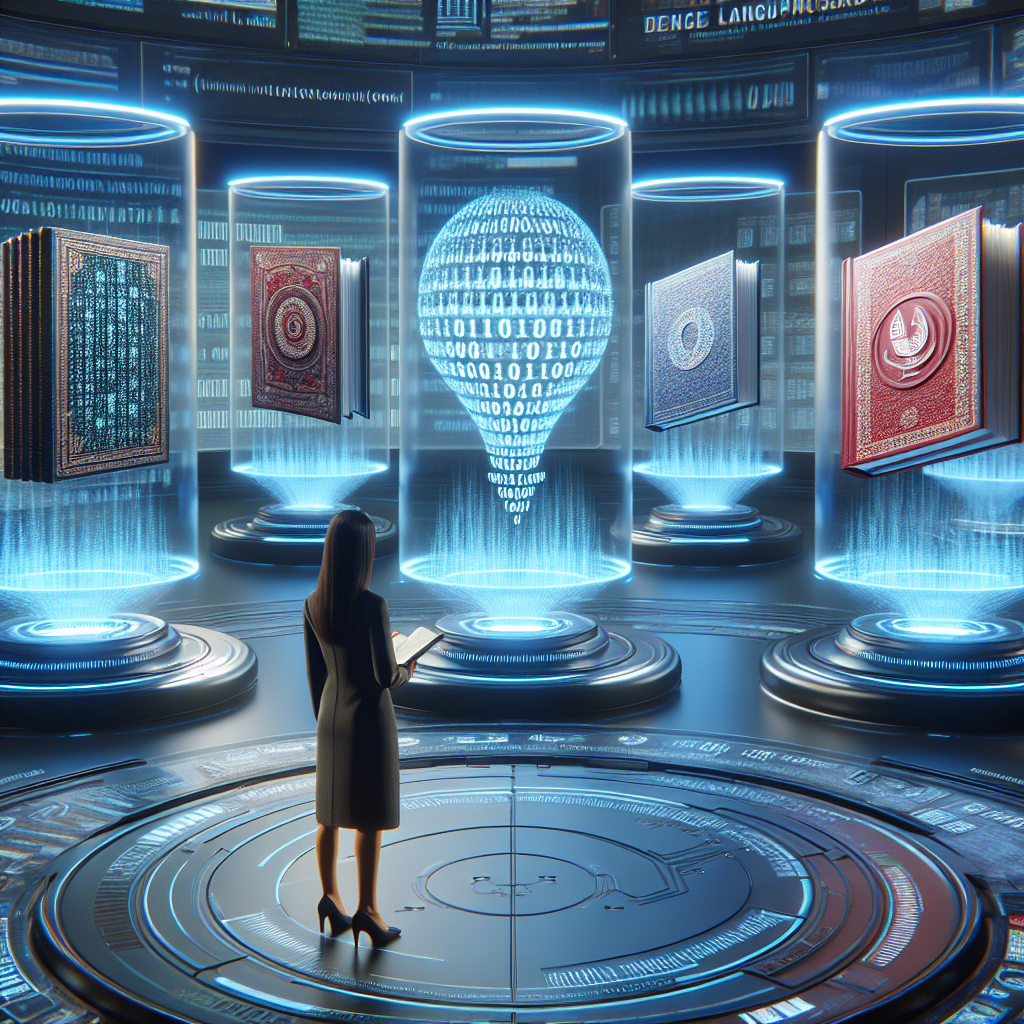

In [25]:
# And just to show you how easy it is: let's generate an image

from IPython.display import Image, display
import base64

response = openai.images.generate(
  model="dall-e-3",
  prompt=f"A photorealistic 3d image that illustrates someone choosing between a huge number of Large Language Models",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))

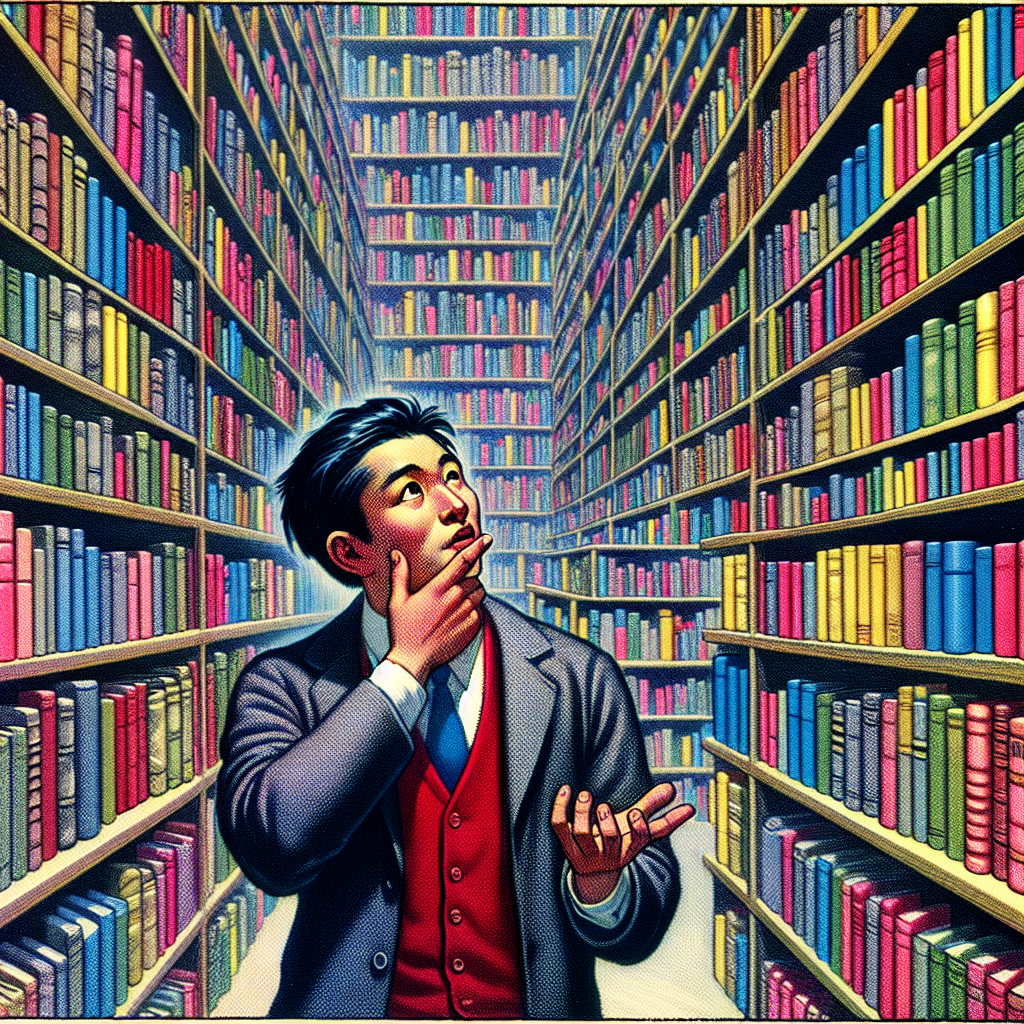

In [26]:
response = openai.images.generate(
  model="dall-e-3",
  prompt=f"A vibrant, pop-art style image that illustrates someone choosing between a huge number of Large Language Models",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))

# Part 3

## Recap: first we tried Frontier LLMs through their chat interfaces
## Then we called Cloud APIs
## Now try the 3rd way to use LLMs - direct inference of Open Source Models running locally with Ollama

Visit the README for instructions on installing Ollama locally.

You can see some comparisons of Open Source models on the [HuggingFace OpenLLM Leaderboard](https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard#/?params=-1%2C15&types=continuously+pretrained%2Cpretrained&filters=is_merged&official=true).

In [ ]:
!ollama pull llama3.2
!ollama pull gemma2
!ollama pull qwen2.5
!ollama pull phi4
!ollama pull deepseek-r1

In [27]:
import ollama

# Let's ask these 4 open-source models to tell a joke

## These are examples of "SLMs", or Small Language Models, but they pack a punch..

In [28]:
response = ollama.chat(model="llama3.2", messages=tell_a_joke)
print(response['message']['content'])

Here's one:

Why did the Large Language Model go to therapy?

Because it was struggling with its "token" boundaries and had a lot of "context"-ual issues!

Get it? Token boundaries... like, tokenization in NLP... but also referring to personal boundaries! Ahh, language models are funny


In [29]:
response = ollama.chat(model="gemma2:2b", messages=tell_a_joke)
print(response['message']['content'])

Why did the large language model cross the road? 

To prove it could do a *prompt* better than the rest! 😄  


Let me know if you want to hear another one! 😁 



# You can also use the OpenAI Client Libraries to connect with Ollama locally

Let's stream back a joke from some big models

In [30]:
ollama_via_openai = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')
stream = ollama_via_openai.chat.completions.create(
    model="qwen2.5:14b",
    messages=tell_a_joke,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

Why did the Large Language Model cross the road?

To generate the most engaging joke for the audience on the other side, of course! But then it realized it could just tell the chicken joke instead because that one’s already trained.

In [31]:
stream = ollama_via_openai.chat.completions.create(
    model="phi4",
    messages=tell_a_joke,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

Sure, here's one for you:

Why did the large language model refuse to play hide and seek?

Because it always ended up in the last word! 

Hope that tickles your processor—or should I say, bytes? 😄

In [32]:
stream = ollama_via_openai.chat.completions.create(
    model="deepseek-r1",
    messages=tell_a_joke,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

<think>
Okay, so the user wants me to tell a light-hearted joke about Large Language Models. Hmm, I should start by thinking about what LLMs are like. They're these AI systems that can generate text, right? They understand English and other languages.

I need something funny but still somewhat relatable. Maybe play on their capabilities. How do they hold up in real-life conversations?

Let me think of scenarios where they might trip. Maybe a situation where someone asks for directions or help with common tasks. LLMs can answer anything, even if it's not helpful like the best route to take.

Maybe make a joke about being an English major comparing themselves versus an LLM. The user liked that previous joke, so maybe that topic is good.

Yes, something like: "Why was the English major confused when meeting the Large Language Model?"

The punchline could be that the LLM already knows every possible grammar point and common mistakes, so the student felt a bit lost or overwhelmed.

That should work! It's light-hearted, uses their expertise to highlight the LLM's capabilities in a funny way.
</think>

Why was the English major confused when meeting the Large Language Model?

Because the LLM knew *every* grammatical rule they could possibly trip them up with—that includes perfect tenses, plural forms, and the correct usage of "your" versus "you're!"

## There are also Cloud API services like we used in Part 2 that allow us to run open-source models..

## Like the blazingly fast inference service Groq

We can also use the amazing inference platform Groq to run inference on large open-source models that would not fit on a local machine.

You'd need to create an account and API key at https://console.groq.com and then add it to your .env file:

`GROQ_API_KEY=gsk_...`

In [33]:
from groq import Groq
groq = Groq()

## Let's start with the massive Mixture Of Experts model Mixtral

This could take a long time as this is a huge model

In [35]:
stream = groq.chat.completions.create(
    model="mixtral-8x7b-32768",
    messages=prompts,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

Sure, I'd be happy to help you decide if a business problem is suitable for a large language model (LLM) solution! Here are some factors to consider:

**1. Problem type**
LLMs are particularly well-suited to problems that involve understanding and generating natural language text. This includes tasks like:

* Text classification (e.g., sentiment analysis, topic modeling)
* Text generation (e.g., chatbots, content creation)
* Named entity recognition
* Part-of-speech tagging
* Dependency parsing
* Information extraction
* Summarization

If your business problem involves working with unstructured text data, an LLM might be a good fit.

**2. Data availability**
LLMs require large amounts of training data to perform well. If you have a dataset that is large enough (tens of thousands to millions of examples) and diverse enough to train an LLM, then it might be a good candidate for an LLM solution.

**3. Model complexity and interpretability**
LLMs can be complex and difficult to interpret, which can make it challenging to understand why they're making certain decisions. If your business problem requires a model that is transparent and easily explainable, then an LLM might not be the best choice.

**4. Computational resources**
Training and deploying LLMs can be computationally intensive. If you have access to the necessary hardware (e.g., GPUs) and the resources to train and deploy the model, then an LLM might be a good fit. However, if you're working with limited computational resources, you might want to consider a simpler model.

**5. Time constraints**
Training and deploying an LLM can take a significant amount of time, especially for larger models. If you have tight time constraints, you might want to consider a simpler model or a pre-trained LLM that can be fine-tuned more quickly.

Overall, the suitability of a business problem for an LLM solution depends on a variety of factors. By considering the type of problem, data availability, model complexity and interpretability, computational resources, and time constraints, you can make an informed decision about whether an LLM is the right choice for your business problem.

## And now for the DeepSeek-r1 model distilled to 70B

In [36]:
stream = groq.chat.completions.create(
    model="deepseek-r1-distill-llama-70b",
    messages=tell_a_joke,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

<think>
Alright, the user wants a light-hearted joke related to Large Language Models. Hmm, I should come up with something that's both funny and relevant to the topic. Maybe play on the idea of these models being all-knowing or having a lot of layers. Let me think... How about comparing the layers in a neural network to something relatable, like an onion? Onions have layers and make you cry, which is a funny twist. So, a Large Language Model with so many layers it could make an onion cry. That should work!
</think>

Sure! Why don’t scientists trust Large Language Models?  

Because they’re always *layering* on the drama! 😄